# Regression


In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import folium
import geopandas as gpd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import math
import folium
import datetime
from os import listdir
from os.path import isfile, join

from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages

import statsmodels.api as sm
from stargazer.stargazer import Stargazer

In [3]:
variaz = pd.read_csv('terremoto/variaz_phone_all.csv', sep=',')
variaz.head()

,Comune,Cratere Centro Italia 2016,media_prima,media_dopo,varPhones,Variaz
0,Abbateggio,0.0,1633.760638,1760.015597,0.077279,-14.463097
1,Acciano,0.0,2560.456228,2732.586008,0.067226,-14.871586
2,Accumoli,1.0,6171.785673,2520.818603,-0.591558,-50.164385
3,Acquacanina,1.0,2203.589215,1719.542948,-0.219663,-34.796726
4,Acqualagna,0.0,20774.803092,22628.154837,0.089212,-9.514810


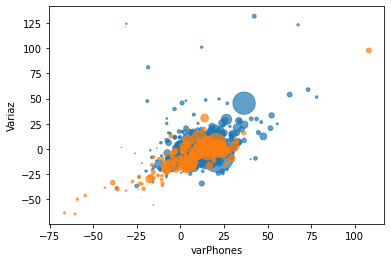

In [4]:
crat0 = variaz[variaz['Cratere Centro Italia 2016']==0]
crat1 = variaz[variaz['Cratere Centro Italia 2016']==1]
plt.scatter(crat0['varPhones']*100,crat0['Variaz'],s=crat0['media_dopo'] / 500,alpha=0.7)
plt.scatter(crat1['varPhones']*100,crat1['Variaz'],s=crat1['media_dopo'] / 500,alpha=0.7)
plt.xlabel('varPhones')
plt.ylabel('Variaz')
plt.show()

In [5]:
ateco2007 = pd.read_csv('terremoto/Ateco2007.csv', sep=';')
ateco1 = ateco2007[ateco2007['Codice Ateco 2007'].str.len()==1].reset_index().drop(['index','Codice Ateco 2007'],axis=1)
ateco1.columns = ['ateco1','desc1']
ateco2 = ateco2007[ateco2007['Codice Ateco 2007'].str.len()==2].reset_index().drop('index',axis=1)
ateco2.columns = ['ateco1','ateco2','desc2']
ateco = pd.merge(ateco1,ateco2)
ateco

,ateco1,desc1,ateco2,desc2
0,A,"AGRICOLTURA, SILVICOLTURA E PESCA",01,COLTIVAZIONI AGRICOLE E PRODUZIONE DI PRODOTTI...
1,A,"AGRICOLTURA, SILVICOLTURA E PESCA",02,SILVICOLTURA ED UTILIZZO DI AREE FORESTALI
2,A,"AGRICOLTURA, SILVICOLTURA E PESCA",03,PESCA E ACQUACOLTURA
3,B,ESTRAZIONE DI MINERALI DA CAVE E MINIERE,05,ESTRAZIONE DI CARBONE (ESCLUSA TORBA)
4,B,ESTRAZIONE DI MINERALI DA CAVE E MINIERE,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE
...,...,...,...,...
83,S,ALTRE ATTIVITÀ DI SERVIZI,95,RIPARAZIONE DI COMPUTER E DI BENI PER USO PERS...
84,S,ALTRE ATTIVITÀ DI SERVIZI,96,ALTRE ATTIVITÀ DI SERVIZI PER LA PERSONA
85,T,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
86,T,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,98,PRODUZIONE DI BENI E SERVIZI INDIFFERENZIATI P...


In [6]:
aida = pd.read_csv('terremoto/aida_crateri2.csv')
aida = aida[aida['ATECO 2007 codice'].notna()]
aida['ATECO 2007 codice'] = aida['ATECO 2007 codice'].astype(int).astype('string')
m = aida['ATECO 2007 codice'].str.len().max()
aida['ATECO 2007 codice'] = aida['ATECO 2007 codice'].str.rjust(m, '0')
aida['ateco2'] = aida['ATECO 2007 codice'].astype('str').str[0:2]
aida = aida[['Comune','Ricavi delle vendite migl EUR Ultimo anno disp.','Dipendenti Ultimo anno disp.','Stato giuridico','ateco2']]
aida.columns = ['Comune','ricavi','dipendenti','stato','ateco2']
aida['survive'] = np.where(aida['stato']=='Attiva', 1, 0)
aida.head(10)

C:\Users\Marco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Comune,ricavi,dipendenti,stato,ateco2,survive
0,Cerreto d'Esi,73297.0,292,Attiva,28,1
1,Cerreto d'Esi,21872.0,179,Cessata (Fusione),27,0
2,Cerreto d'Esi,21804.0,158,Fallita,31,0
3,Cerreto d'Esi,16484.0,25,Cessata (Fusione),46,0
4,Cerreto d'Esi,14400.0,86,Fallita,17,0
5,Cerreto d'Esi,13232.0,8,Cessata (Fusione),27,0
6,Cerreto d'Esi,8861.0,39,Attiva,31,1
7,Cerreto d'Esi,5636.0,6,Attiva,24,1
8,Cerreto d'Esi,5529.0,11,Attiva,20,1
9,Cerreto d'Esi,4099.0,2,Fallita,49,0


In [7]:
aida = pd.read_csv('terremoto/aida_crateri3.csv')
aida = aida[['Comune','Ricavi delle vendite migl EUR Ultimo anno disp.','Dipendenti Ultimo anno disp.','Stato giuridico','ateco2','survived']]
aida.columns = ['Comune','ricavi','dipendenti','stato','ateco2','survive']

aida['ateco2'] = aida['ateco2'].astype('string')
m = aida['ateco2'].str.len().max()
aida['ateco2'] = aida['ateco2'].str.rjust(m, '0').astype('str').str[0:2]

aida[aida['ateco2']=='02']

,Comune,ricavi,dipendenti,stato,ateco2,survive
115,Fabriano,2010.0,3,Attiva,02,1
183,Fabriano,601.0,0,Attiva,02,1
190,Fabriano,537.0,42,Fallita,02,0
249,Fabriano,250.0,30,Cessata (Fusione),02,0
434,Fabriano,1.0,2,Attiva,02,1
...,...,...,...,...,...,...
52484,Fara in Sabina,160.0,3,Attiva,02,1
52750,Caramanico Terme,136.0,1,Attiva,02,1
52911,Magliano de' Marsi,132.0,5,Attiva,02,1
53167,Massa d'Albe,0.0,0,Attiva,02,1


In [8]:
aida_ateco = pd.merge(aida.astype('str') , ateco.astype('str') , how='left', on='ateco2')
aida_ateco.loc[aida_ateco['ricavi'] == 'n.d.','ricavi'] = np.nan
aida_ateco.loc[aida_ateco['dipendenti'] == 'n.d.','dipendenti'] = np.nan
aida_ateco['survive'] = aida_ateco['survive'].astype('int')
aida_ateco['ricavi'] = aida_ateco['ricavi'].astype('float')
aida_ateco['dipendenti'] = aida_ateco['dipendenti'].astype('float')
aida_ateco[aida_ateco['ateco1']=='A']
#aida_ateco.head()

,Comune,ricavi,dipendenti,stato,ateco2,survive,ateco1,desc1,desc2
115,Fabriano,2010.0,3.0,Attiva,02,1,A,"AGRICOLTURA, SILVICOLTURA E PESCA",SILVICOLTURA ED UTILIZZO DI AREE FORESTALI
183,Fabriano,601.0,0.0,Attiva,02,1,A,"AGRICOLTURA, SILVICOLTURA E PESCA",SILVICOLTURA ED UTILIZZO DI AREE FORESTALI
190,Fabriano,537.0,42.0,Fallita,02,0,A,"AGRICOLTURA, SILVICOLTURA E PESCA",SILVICOLTURA ED UTILIZZO DI AREE FORESTALI
249,Fabriano,250.0,30.0,Cessata (Fusione),02,0,A,"AGRICOLTURA, SILVICOLTURA E PESCA",SILVICOLTURA ED UTILIZZO DI AREE FORESTALI
346,Fabriano,62.0,9.0,Attiva,01,1,A,"AGRICOLTURA, SILVICOLTURA E PESCA",COLTIVAZIONI AGRICOLE E PRODUZIONE DI PRODOTTI...
...,...,...,...,...,...,...,...,...,...
53234,Celano,181.0,0.0,Attiva,01,1,A,"AGRICOLTURA, SILVICOLTURA E PESCA",COLTIVAZIONI AGRICOLE E PRODUZIONE DI PRODOTTI...
53235,Celano,180.0,3.0,Attiva,01,0,A,"AGRICOLTURA, SILVICOLTURA E PESCA",COLTIVAZIONI AGRICOLE E PRODUZIONE DI PRODOTTI...
53242,Celano,105.0,0.0,Attiva,01,1,A,"AGRICOLTURA, SILVICOLTURA E PESCA",COLTIVAZIONI AGRICOLE E PRODUZIONE DI PRODOTTI...
53273,Celano,0.0,0.0,Attiva,01,0,A,"AGRICOLTURA, SILVICOLTURA E PESCA",COLTIVAZIONI AGRICOLE E PRODUZIONE DI PRODOTTI...


In [9]:
aida_ateco_live = aida_ateco[aida_ateco['survive']==1]
aida_ateco_dead = aida_ateco[aida_ateco['survive']==0]

def ateco_groupby(df):
    aggregation = {'survive':[np.size,np.sum,np.mean],'ricavi':[np.sum],'dipendenti':[np.sum]}
    ateco0 = df.groupby(['Comune']).aggregate(aggregation).reset_index()
    ateco0.columns = ['Comune','n_imprese','n_imprese_attive','perc_survive','tot_ricavi','tot_dipendenti']
    ateco1 = df.groupby(['Comune', 'ateco1','desc1']).aggregate(aggregation).reset_index()
    ateco1.columns = ['Comune','ateco1','desc1','n_imprese','n_imprese_attive','perc_survive','tot_ricavi','tot_dipendenti']
    ateco2 = df.groupby(['Comune','ateco2','desc2']).aggregate(aggregation).reset_index()
    ateco2.columns = ['Comune','ateco2','desc2','n_imprese','n_imprese_attive','perc_survive','tot_ricavi','tot_dipendenti']
    return (ateco0,ateco1,ateco2)

all_ateco0,all_ateco1,all_ateco2 = ateco_groupby(aida_ateco)
dead_ateco0,dead_ateco1,dead_ateco2 = ateco_groupby(aida_ateco_dead)
live_ateco0,live_ateco1,live_ateco2 = ateco_groupby(aida_ateco_live)



In [10]:

def all_dead_live_merge(_all,dead,live,start):
    _all = _all.drop('n_imprese_attive',axis=1)
    dead = dead.drop(['n_imprese_attive','perc_survive'],axis=1)
    d = {}
    for c in dead.columns[start:]:
        d[c] = c+'_dead'
    dead = dead.rename(columns=d)
    live = live.drop(['n_imprese_attive','perc_survive'],axis=1)
    d = {}
    for c in live.columns[start:]:
        d[c] = c+'_live'
    live = live.rename(columns=d)
    return _all.merge(dead).merge(live)

imprese_ateco0 = all_dead_live_merge(all_ateco0,dead_ateco0,live_ateco0,1)
imprese_ateco1 = all_dead_live_merge(all_ateco1,dead_ateco1,live_ateco1,3)
imprese_ateco2 = all_dead_live_merge(all_ateco2,dead_ateco2,live_ateco2,3)
imprese_ateco1.head(3)

,Comune,ateco1,desc1,n_imprese,perc_survive,tot_ricavi,tot_dipendenti,n_imprese_dead,tot_ricavi_dead,tot_dipendenti_dead,n_imprese_live,tot_ricavi_live,tot_dipendenti_live
0,Acciano,G,COMMERCIO ALL'INGROSSO E AL DETTAGLIO; RIPARAZ...,2,0.500,128.0,2.0,1,120.0,2.0,1,8.0,0.0
1,Acqualagna,C,ATTIVITÀ MANIFATTURIERE,16,0.875,10485.0,126.0,2,24.0,33.0,14,10461.0,93.0
2,Acqualagna,G,COMMERCIO ALL'INGROSSO E AL DETTAGLIO; RIPARAZ...,5,0.600,5481.0,27.0,2,228.0,1.0,3,5253.0,26.0


Index(['Comune', 'Cratere Centro Italia 2016', 'media_prima', 'media_dopo',
       'varPhones', 'Variaz', 'n_imprese', 'perc_survive', 'tot_ricavi',
       'tot_dipendenti', 'n_imprese_dead', 'tot_ricavi_dead',
       'tot_dipendenti_dead', 'n_imprese_live', 'tot_ricavi_live',
       'tot_dipendenti_live', 'dip_survive', 'ric_survive'],
      dtype='object')


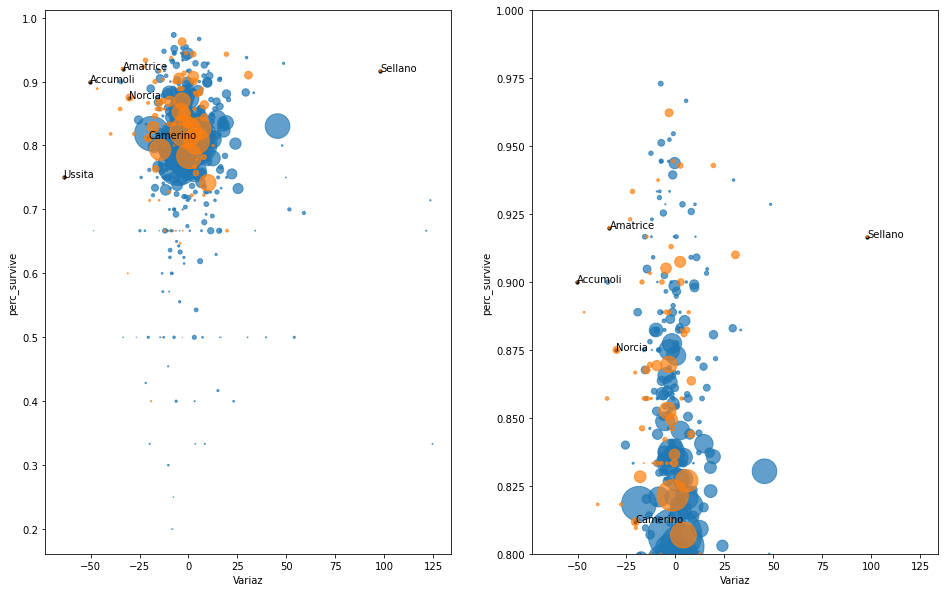

In [22]:
phone_company = pd.merge(variaz, imprese_ateco0, how='inner', on='Comune').fillna(0)
phone_company['dip_survive'] = phone_company['tot_dipendenti_live'] / phone_company['tot_dipendenti']
phone_company['ric_survive'] = phone_company['tot_ricavi_live'] / phone_company['tot_ricavi']
print(phone_company.columns)
x = 'Variaz'
y = 'perc_survive'


crat0 = phone_company[phone_company['Cratere Centro Italia 2016']==0]
crat1 = phone_company[phone_company['Cratere Centro Italia 2016']==1]
fig = plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
for c in ['Amatrice','Camerino','Accumoli','Norcia','Sellano','Ussita']:
    eg = phone_company[phone_company['Comune']==c].reset_index()
    plt.scatter(eg[x],eg[y],c='#000000',s=10)
    plt.text(eg[x],eg[y],eg['Comune'][0])
plt.scatter(crat0[x],crat0[y],s=crat0['tot_dipendenti'] / 10,alpha=0.7)
plt.scatter(crat1[x],crat1[y],s=crat1['tot_dipendenti'] / 10,alpha=0.7)
plt.xlabel(x)
plt.ylabel(y)
plt.subplot(1,2,2)
for c in ['Amatrice','Camerino','Accumoli','Norcia','Sellano']:
    eg = phone_company[phone_company['Comune']==c].reset_index()
    plt.scatter(eg[x],eg[y],c='#000000',s=10)
    plt.text(eg[x],eg[y],eg['Comune'][0])
plt.scatter(crat0[x],crat0[y],s=crat0['tot_dipendenti'] / 10,alpha=0.7)
plt.scatter(crat1[x],crat1[y],s=crat1['tot_dipendenti'] / 10,alpha=0.7)
plt.xlabel(x)
plt.ylabel(y)
plt.ylim([0.8,1])
plt.show()


# il numero delle imprese sopravvissute sembra indipendente dalla variazione dei cellulari
# comuni che dalle notizie sembrano distrutti hanno un 90%+ di aziende sopravvissute


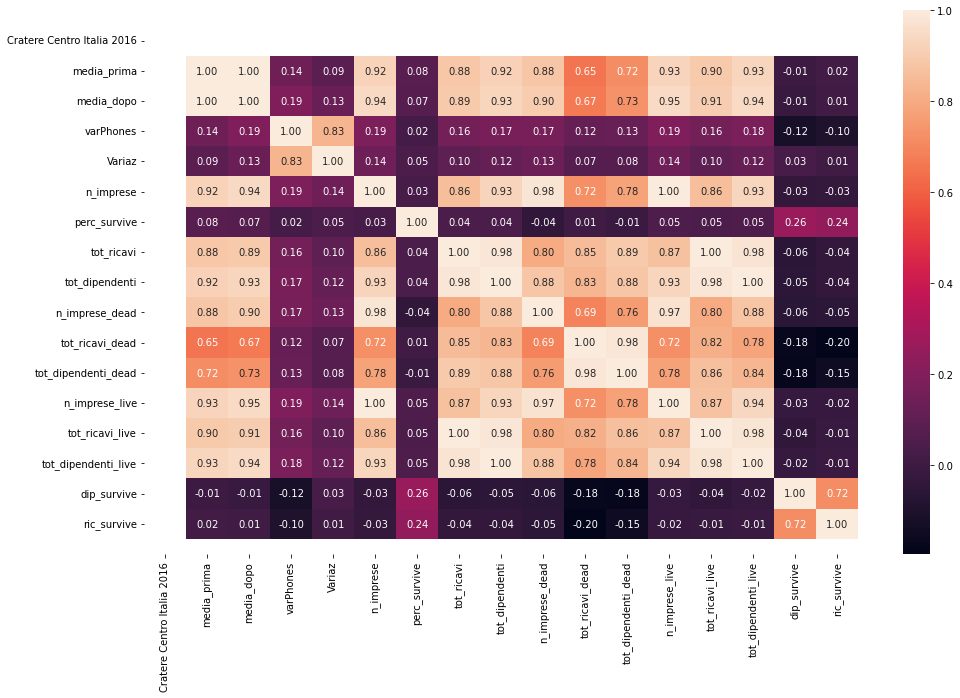

In [46]:
fig = plt.figure(figsize=(16,10))
font = {'size'   : 10}
matplotlib.rc('font', **font)
correlation_mat = (crat1.corr())
ax = sns.heatmap(correlation_mat, annot = True,fmt = '.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [23]:
value = 'perc_survive'
imprese_ateco_wide = imprese_ateco1.pivot(index='Comune',columns='ateco1')[value].fillna(0)
#imprese_ateco_wide = imprese_ateco2.pivot(index='Comune',columns='ateco2')[value].fillna(0)
imprese_ateco_wide.head(2)

ateco1,A,B,C,D,E,F,G,H,I,J,K,L,M,N,P,Q,R,S
Comune,,,,,,,,,,,,,,,,,,
Acciano,0.0,0.0,0.000,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Acqualagna,0.0,0.0,0.875,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.8,0.0,0.666667,0.0,0.0,0.0,0.0


In [24]:
xy = pd.merge(variaz, imprese_ateco_wide, how='inner', on='Comune').fillna(0)
xy = xy[xy['Cratere Centro Italia 2016']==1]
xy = xy.drop(['Cratere Centro Italia 2016'],axis=1)
xy

,Comune,media_prima,media_dopo,varPhones,Variaz,A,B,C,D,E,...,I,J,K,L,M,N,P,Q,R,S
3,Acquasanta Terme,15586.085229,15172.258024,-0.026551,-20.579991,0.00,0.5,0.000000,0.00,0.0,...,0.5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.5,0.0,0.0
12,Amandola,23203.310837,24829.737794,0.070095,-16.145167,0.75,0.0,0.857143,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
13,Amatrice,17202.975125,10522.783228,-0.388316,-33.685087,0.00,0.0,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
17,Antrodoco,9796.916249,10260.919078,0.047362,2.915668,0.00,0.0,0.500000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
19,Apiro,12705.998200,12979.425407,0.021520,-17.092141,0.00,0.0,0.750000,0.00,0.0,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Tolentino,88238.708253,96270.204679,0.091020,-4.025662,0.80,0.0,0.829268,0.00,0.0,...,0.0,0.0,0.0,0.840909,0.0,0.571429,0.0,0.0,0.0,0.0
408,Torricella Sicura,7558.784034,8241.604543,0.090335,1.716214,0.00,0.0,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0
410,Tossicia,5702.472619,7169.594259,0.257278,-14.933664,0.00,0.0,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
411,Treia,60218.188681,62390.025090,0.036066,-18.015711,0.00,0.0,0.800000,0.75,0.0,...,0.6,0.5,0.0,0.961538,0.0,0.500000,0.0,0.0,0.0,0.0


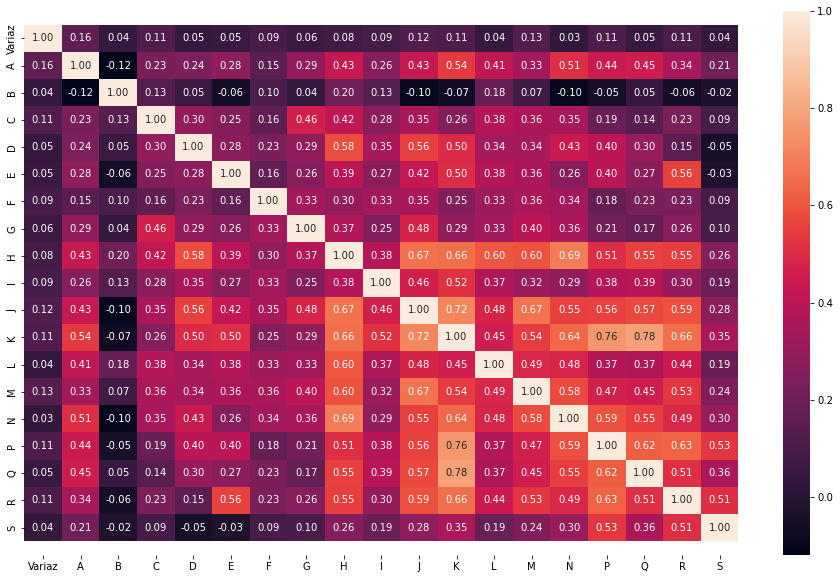

In [25]:
zz = xy.drop(['Comune','media_prima','media_dopo','varPhones'],axis=1)
fig = plt.figure(figsize=(16,10))
font = {'size'   : 10}
matplotlib.rc('font', **font)
correlation_mat = (zz.corr())
ax = sns.heatmap(correlation_mat, annot = True,fmt = '.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [49]:
sae = pd.read_csv('terremoto/SAE_Finale.csv',encoding='latin-1', sep= ';')
sae_ordinate = sae.groupby(['Comune'])['Numero Sae ordinate '].sum().reset_index()
sae_ordinate.columns = ['Comune','SAE']
#xy = pd.merge(xy, sae_ordinate, how='left', on='Comune').fillna(0)

In [50]:
phone_sae = pd.merge(variaz, sae_ordinate, how='left', on='Comune').fillna(0)
phone_sae.head(2)

,Comune,Cratere Centro Italia 2016,media_prima,media_dopo,varPhones,Variaz,SAE
0,Abbateggio,0.0,1633.760638,1760.015597,0.077279,-14.463097,0.0
1,Acciano,0.0,2560.456228,2732.586008,0.067226,-14.871586,0.0


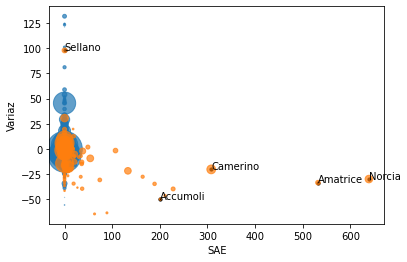

In [51]:
for c in ['Amatrice','Camerino','Accumoli','Norcia','Sellano']:
    eg = phone_sae[phone_sae['Comune']==c].reset_index()
    plt.scatter(eg['SAE'],eg['Variaz'],c='#000000',s=10)
    plt.text(eg['SAE'],eg['Variaz'],eg['Comune'][0])

crat0 = phone_sae[phone_sae['Cratere Centro Italia 2016']==0]
crat1 = phone_sae[phone_sae['Cratere Centro Italia 2016']==1]
plt.scatter(crat0['SAE'],crat0['Variaz'],s=crat0['media_dopo'] / 500,alpha=0.7)
plt.scatter(crat1['SAE'],crat1['Variaz'],s=crat1['media_dopo'] / 500,alpha=0.7)
plt.xlabel('SAE')
plt.ylabel('Variaz')
plt.show()

In [52]:
xy.columns

Index(['Comune', 'media_prima', 'media_dopo', 'varPhones', 'Variaz', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S'],
      dtype='object')

In [53]:
x = xy.drop(['Comune','media_prima','media_dopo','varPhones','Variaz'], axis=1)
#x = x.drop(['O', 'S', 'U'], axis=1)
y1 = xy['varPhones']
y2 = xy['Variaz']
x

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,P,Q,R,S
3,0.0,919.0,0.0,0.0,0.0,1733.0,0.0,0.0,442.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
12,175.0,0.0,9348.0,0.0,0.0,624.0,13059.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,2415.0,7337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,3006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,22802.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3511.0,0.0,153184.0,0.0,0.0,41428.0,144376.0,0.0,0.0,0.0,0.0,2842.0,0.0,660.0,0.0,0.0,0.0,0.0
408,0.0,0.0,0.0,0.0,0.0,5374.0,431.0,0.0,0.0,0.0,0.0,0.0,167.0,0.0,0.0,0.0,0.0,0.0
410,0.0,0.0,0.0,0.0,0.0,1236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
411,0.0,0.0,248662.0,362.0,0.0,15027.0,56798.0,9917.0,841.0,7668.0,0.0,5956.0,0.0,821.0,0.0,0.0,0.0,0.0


In [54]:
model1 = sm.OLS(y1, x).fit()
model2 = sm.OLS(y2, x).fit()
#predictions = model1.predict(x)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              varPhones   R-squared (uncentered):                   0.143
Model:                            OLS   Adj. R-squared (uncentered):             -0.098
Method:                 Least Squares   F-statistic:                             0.5928
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                       0.892
Time:                        11:24:23   Log-Likelihood:                          21.295
No. Observations:                  82   AIC:                                     -6.589
Df Residuals:                      64   BIC:                                      36.73
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A           1.134e-05   3.55e-05      0.320      0.750   -5.95e-05    8.22e-05
B          -1.105e-05      0.000     -0.090      0.928      -0.000       0.000
C           5.093e-07   7.18e-07      0.710      0.481   -9.24e-07    1.94e-06
D           1.552e-05   2.15e-05      0.723      0.472   -2.74e-05    5.84e-05
E          -3.656e-06    1.2e-05     -0.305      0.761   -2.76e-05    2.03e-05
F            2.44e-06    4.6e-06      0.530      0.598   -6.76e-06    1.16e-05
G          -4.482e-07   1.64e-06     -0.273      0.786   -3.73e-06    2.84e-06
H          -2.636e-06      1e-05     -0.263      0.793   -2.26e-05    1.74e-05
I          -1.105e-06   3.29e-05     -0.034      0.973   -6.68e-05    6.46e-05
J          -2.032e-06   3.27e-05     -0.062      0.951   -6.73e-05    6.32e-05
K          -3.968e-07   5.26e-06     -0.075      0.940   -1.09e-05    1.01e-05
L           3.954e-06   4.52e-06      0.875      0.385   -5.08e-06     1.3e-05
M           7.115e-07    2.2e-06      0.324      0.747   -3.68e-06     5.1e-06
N           -2.13e-06   5.32e-06     -0.401      0.690   -1.27e-05    8.49e-06
P             -0.0003      0.001     -0.388      0.699      -0.002       0.001
Q           1.347e-05    6.6e-05      0.204      0.839      -0.000       0.000
R              0.0002      0.002      0.118      0.906      -0.003       0.004
S             -0.0007      0.006     -0.106      0.916      -0.014       0.012
==============================================================================
Omnibus:                       56.477   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.071
Skew:                           1.773   Prob(JB):                    1.30e-115
Kurtosis:                      14.928   Cond. No.                     5.24e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
stargazer = Stargazer([model1,model2])
stargazer.render_latex()
stargazer